In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats

import pandas_profiling as pp
import matplotlib

%matplotlib inline

sns.set(style="darkgrid")

The file has the below structure:

| Column Name | Description | Type | Sample Values |
| --- | --- | --- | --- |
| shop_week | Identifies the week of the basket | Char | Format is YYYYWW where the first 4 characters identify the fiscal year and the other two characters identify the specific week within the year (e.g. 200735). Being the fiscal year, the first week doesn’t start in January.  (See time.csv file for start/end dates of each week) |
| shop_date | Date when shopping has been made. Date is specified in the yyyymmdd format | Char | 20060413, 20060412 |
| shop_weekday | Identifies the day of the week | Num | 1=Sunday, 2=Monday, …, 7=Saturday |
| shop_hour | Hour slot of the shopping | Num | 0=00:00-00:59, 1=01:00-01:59, …23=23:00-23:59 |
| Quantity | Number of items of the same product bought in this basket | Num | Integer number |
| spend | Spend associated to the items bought | Num | Number with two decimal digits |
| prod_code | Product Code | Char | PRD0900001, PRD0900003 |
| prod_code_10 | Product Hierarchy Level 10 Code | Char | CL00072, CL00144 |
| prod_code_20 | Product Hierarchy Level 20 Code | Char | DEP00021, DEP00051 |
| prod_code_30 | Product Hierarchy Level 30 Code | Char | G00007, G00015 |
| prod_code_40 | Product Hierarchy Level 40 Code | Char | D00002, D00003 |
| cust_code | Customer Code | Char | CUST0000001624, CUST0000001912 |
| cust_price_sensitivity | Customer’s Price Sensitivity | Char | LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified |
| cust_lifestage | Customer’s Lifestage | Char | YA=Young Adults, OA=Older Adults, YF=Young Families, OF=Older Families, PE=Pensioners, OT=Other, XX=unclassified |
| basket_id | Basket ID. All items in a basket share the same basket_id value. | Num | 994100100000020, 994100100000344 |
| basket_size | Basket size | Char | L=Large, M=Medium, S=Small |
| basket_price_sensitivity | Basket price sensitivity  | Char | LA=Less Affluent, MM=Mid Market, UM=Up Market, XX=unclassified |
| basket_type | Basket type | Char | Small Shop, Top Up, Full Shop, XX |
| basket_dominant_mission | Shopping dominant mission | Char | Fresh, Grocery, Mixed, Non Food, XX |
| store_code | Store Code | Char | STORE00001, STORE00002 |
| store_format | Format of the Store | Char | LS, MS, SS, XLS |
| store_region | Region the store belongs to | Char | E02, W01, E01, N03 |


In [2]:
supermarket_df = pd.read_csv("supermarket_till_transactions.csv", parse_dates=["SHOP_DATE"])
supermarket_df.sample(10)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
39,200607,2006-04-13,5,8,3,243,PRD0903744,CL00199,DEP00067,G00021,...,MM,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01
97,200607,2006-04-12,4,15,3,99,PRD0903285,CL00128,DEP00046,G00013,...,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03
30,200607,2006-04-13,5,8,1,132,PRD0900608,CL00067,DEP00019,G00007,...,MM,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01
106,200607,2006-04-12,4,12,1,247,PRD0903714,CL00201,DEP00067,G00021,...,MM,OF,994100100470269,L,UM,Top Up,Nonfood,STORE00288,LS,S03
26,200607,2006-04-11,3,15,1,63,PRD0903052,CL00031,DEP00008,G00004,...,LA,OT,994100100206798,M,UM,Small Shop,Mixed,STORE00002,LS,W01
78,200607,2006-04-12,4,13,1,52,PRD0900024,CL00160,DEP00054,G00016,...,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
58,200607,2006-04-10,2,9,1,1406,PRD0902446,CL00229,DEP00081,G00027,...,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02
80,200607,2006-04-12,4,13,1,71,PRD0901264,CL00067,DEP00019,G00007,...,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
115,200607,2006-04-14,6,19,1,485,PRD0900114,CL00237,DEP00084,G00028,...,LA,OA,994100100540327,M,MM,Small Shop,Grocery,STORE02847,LS,N01
59,200607,2006-04-10,2,9,3,294,PRD0903351,CL00005,DEP00002,G00001,...,NaN,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02


In [3]:
# supermarket_df["SHOP_DATE"].astype("str")
supermarket_df["DATES"] = matplotlib.dates.datestr2num(supermarket_df["SHOP_DATE"].astype("str"))
supermarket_df.sample(10)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,DATES
113,200607,2006-04-13,5,15,1,102,PRD0904887,CL00041,DEP00011,G00004,...,YF,994100100532896,S,UM,Small Shop,Fresh,STORE01668,LS,N03,732414.0
39,200607,2006-04-13,5,8,3,243,PRD0903744,CL00199,DEP00067,G00021,...,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01,732414.0
37,200607,2006-04-13,5,8,3,303,PRD0903074,CL00045,DEP00011,G00004,...,OT,994100100398404,L,MM,Full Shop,Mixed,STORE00008,MS,N01,732414.0
50,200607,2006-04-10,2,9,1,125,PRD0901020,CL00049,DEP00012,G00004,...,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,732411.0
15,200607,2006-04-14,6,15,1,75,PRD0900649,CL00140,DEP00049,G00014,...,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01,732415.0
12,200607,2006-04-14,6,15,1,17,PRD0900167,CL00130,DEP00047,G00013,...,OT,994100100206797,L,LA,Top Up,Fresh,STORE00002,LS,W01,732415.0
96,200607,2006-04-12,4,15,1,101,PRD0903074,CL00045,DEP00011,G00004,...,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03,732413.0
7,200607,2006-04-12,4,19,3,192,PRD0903409,CL00070,DEP00020,G00007,...,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02,732413.0
70,200607,2006-04-12,4,20,1,46,PRD0904891,CL00025,DEP00008,G00004,...,NaN,994100100091691,M,MM,Small Shop,Fresh,STORE00025,XLS,S02,732413.0
60,200607,2006-04-10,2,9,4,1820,PRD0904014,CL00240,DEP00086,G00028,...,NaN,994100100014637,L,UM,Full Shop,Mixed,STORE00013,LS,N02,732411.0


In [4]:
supermarket_df.nunique()

SHOP_WEEK                     1
SHOP_DATE                     5
SHOP_WEEKDAY                  5
SHOP_HOUR                     9
QUANTITY                      5
SPEND                       101
PROD_CODE                   110
PROD_CODE_10                 69
PROD_CODE_20                 40
PROD_CODE_30                 17
PROD_CODE_40                  5
CUST_CODE                     8
CUST_PRICE_SENSITIVITY        3
CUST_LIFESTAGE                5
BASKET_ID                    19
BASKET_SIZE                   3
BASKET_PRICE_SENSITIVITY      3
BASKET_TYPE                   3
BASKET_DOMINANT_MISSION       4
STORE_CODE                   16
STORE_FORMAT                  4
STORE_REGION                  9
DATES                         5
dtype: int64

In [5]:
supermarket_df.isna().sum()

SHOP_WEEK                    0
SHOP_DATE                    0
SHOP_WEEKDAY                 0
SHOP_HOUR                    0
QUANTITY                     0
SPEND                        0
PROD_CODE                    0
PROD_CODE_10                 0
PROD_CODE_20                 0
PROD_CODE_30                 0
PROD_CODE_40                 0
CUST_CODE                   46
CUST_PRICE_SENSITIVITY      46
CUST_LIFESTAGE              46
BASKET_ID                    0
BASKET_SIZE                  0
BASKET_PRICE_SENSITIVITY     0
BASKET_TYPE                  0
BASKET_DOMINANT_MISSION      0
STORE_CODE                   0
STORE_FORMAT                 0
STORE_REGION                 0
DATES                        0
dtype: int64

In [6]:
supmrkt_class_df = supermarket_df[["DATES", "SHOP_HOUR", "QUANTITY", "SPEND", "BASKET_SIZE","BASKET_TYPE","BASKET_DOMINANT_MISSION","BASKET_PRICE_SENSITIVITY"]]
supmrkt_class_df.sample(10)

,DATES,SHOP_HOUR,QUANTITY,SPEND,BASKET_SIZE,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_PRICE_SENSITIVITY
59,732411.0,9,3,294,L,Full Shop,Mixed,UM
83,732413.0,13,1,32,L,Top Up,Fresh,UM
43,732414.0,8,1,226,L,Full Shop,Mixed,MM
18,732415.0,15,1,32,L,Top Up,Fresh,LA
85,732413.0,13,1,67,L,Top Up,Fresh,UM
39,732414.0,8,3,243,L,Full Shop,Mixed,MM
37,732414.0,8,3,303,L,Full Shop,Mixed,MM
101,732413.0,13,1,17,S,Small Shop,Fresh,LA
73,732415.0,16,3,69,M,Small Shop,Fresh,LA
11,732414.0,20,4,340,L,Top Up,Fresh,LA


In [7]:
for x in range(25):
    if x>=4 and x<12:
        supmrkt_class_df.SHOP_HOUR.replace(to_replace=x,value="Morning",inplace=True)
    elif x>=12 and x <16:
        supmrkt_class_df.SHOP_HOUR.replace(to_replace=x,value="Afternoon",inplace=True)
    elif x >= 16 and x < 23:
        supmrkt_class_df.SHOP_HOUR.replace(to_replace=x,value="Evening",inplace=True)
    else:
        supmrkt_class_df.SHOP_HOUR.replace(to_replace=x,value="Night",inplace=True)
        
    x+=1

supmrkt_class_df.BASKET_SIZE.replace(to_replace="S",value="M",inplace=True)

supmrkt_class_df.sample(10)   

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,DATES,SHOP_HOUR,QUANTITY,SPEND,BASKET_SIZE,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_PRICE_SENSITIVITY
52,732411.0,Morning,3,357,L,Full Shop,Mixed,UM
27,732415.0,Afternoon,1,101,L,Top Up,Fresh,LA
78,732413.0,Afternoon,1,52,L,Top Up,Fresh,UM
21,732415.0,Afternoon,9,306,L,Top Up,Fresh,LA
47,732411.0,Morning,1,277,L,Full Shop,Mixed,UM
114,732411.0,Morning,3,729,M,Small Shop,Grocery,MM
22,732415.0,Afternoon,1,118,L,Top Up,Fresh,LA
109,732412.0,Morning,1,101,M,Small Shop,Nonfood,LA
41,732414.0,Morning,1,386,L,Full Shop,Mixed,MM
91,732413.0,Afternoon,1,163,L,Top Up,Fresh,LA


In [8]:
supmrkt_class_df.nunique()

DATES                         5
SHOP_HOUR                     3
QUANTITY                      5
SPEND                       101
BASKET_SIZE                   2
BASKET_TYPE                   3
BASKET_DOMINANT_MISSION       4
BASKET_PRICE_SENSITIVITY      3
dtype: int64

In [9]:
supmrkt_class_df.describe()

,DATES,QUANTITY,SPEND
count,119.000000,119.000000,119.000000
mean,732413.226891,1.512605,203.100840
std,1.265159,1.227272,248.774637
min,732411.000000,1.000000,13.000000
25%,732413.000000,1.000000,74.500000
50%,732413.000000,1.000000,132.000000
75%,732414.000000,1.000000,241.000000
max,732415.000000,9.000000,1820.000000


In [10]:
supmrkt_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
DATES                       119 non-null float64
SHOP_HOUR                   119 non-null object
QUANTITY                    119 non-null int64
SPEND                       119 non-null int64
BASKET_SIZE                 119 non-null object
BASKET_TYPE                 119 non-null object
BASKET_DOMINANT_MISSION     119 non-null object
BASKET_PRICE_SENSITIVITY    119 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ KB


In [11]:
pp.ProfileReport(supmrkt_class_df)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
supmrkt_class_df.sample(10)

,DATES,SHOP_HOUR,QUANTITY,SPEND,BASKET_SIZE,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_PRICE_SENSITIVITY
61,732411.0,Morning,1,39,L,Full Shop,Mixed,UM
25,732415.0,Afternoon,1,92,L,Top Up,Fresh,LA
38,732414.0,Morning,1,180,L,Full Shop,Mixed,MM
102,732413.0,Afternoon,3,273,L,Top Up,Nonfood,UM
58,732411.0,Morning,1,1406,L,Full Shop,Mixed,UM
46,732411.0,Morning,1,52,L,Full Shop,Mixed,UM
0,732414.0,Evening,1,103,L,Top Up,Fresh,LA
9,732413.0,Evening,3,465,M,Small Shop,Fresh,MM
42,732414.0,Morning,1,122,L,Full Shop,Mixed,MM
87,732413.0,Afternoon,1,154,L,Top Up,Fresh,UM


In [13]:
supmrkt_class_df.mean()

DATES       732413.226891
QUANTITY         1.512605
SPEND          203.100840
dtype: float64

In [14]:
supmrkt_class_df.mode()

,DATES,SHOP_HOUR,QUANTITY,SPEND,BASKET_SIZE,BASKET_TYPE,BASKET_DOMINANT_MISSION,BASKET_PRICE_SENSITIVITY
0,732413.0,Afternoon,1,101,L,Top Up,Fresh,UM


In [15]:
supmrkt_class_df.median()

DATES       732413.0
QUANTITY         1.0
SPEND          132.0
dtype: float64

In [16]:
supmrkt_class_df.describe()

,DATES,QUANTITY,SPEND
count,119.000000,119.000000,119.000000
mean,732413.226891,1.512605,203.100840
std,1.265159,1.227272,248.774637
min,732411.000000,1.000000,13.000000
25%,732413.000000,1.000000,74.500000
50%,732413.000000,1.000000,132.000000
75%,732414.000000,1.000000,241.000000
max,732415.000000,9.000000,1820.000000


In [17]:
supmrkt_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
DATES                       119 non-null float64
SHOP_HOUR                   119 non-null object
QUANTITY                    119 non-null int64
SPEND                       119 non-null int64
BASKET_SIZE                 119 non-null object
BASKET_TYPE                 119 non-null object
BASKET_DOMINANT_MISSION     119 non-null object
BASKET_PRICE_SENSITIVITY    119 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ KB


In [18]:
supmrkt_class_df.kurtosis()

DATES       -0.744049
QUANTITY    13.266849
SPEND       20.539802
dtype: float64

In [19]:
supmrkt_class_df.skew()

DATES      -0.310511
QUANTITY    3.215793
SPEND       4.031387
dtype: float64

In [20]:
supmrkt_class_df.nunique()

DATES                         5
SHOP_HOUR                     3
QUANTITY                      5
SPEND                       101
BASKET_SIZE                   2
BASKET_TYPE                   3
BASKET_DOMINANT_MISSION       4
BASKET_PRICE_SENSITIVITY      3
dtype: int64

In [21]:
supmrkt_class_df.groupby("BASKET_PRICE_SENSITIVITY").sum()

,DATES,QUANTITY,SPEND
BASKET_PRICE_SENSITIVITY,,,
LA,29296557.0,72,5105
MM,26366896.0,46,8333
UM,31493721.0,62,10731


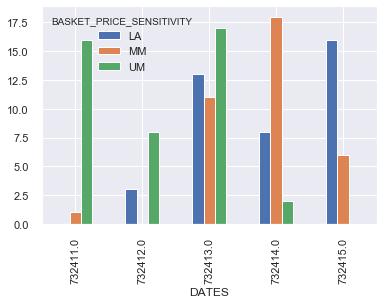

In [22]:
pd.crosstab(supmrkt_class_df.DATES, supmrkt_class_df.BASKET_PRICE_SENSITIVITY).plot(kind = "bar");

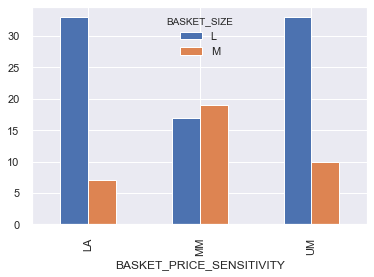

In [23]:
pd.crosstab(supmrkt_class_df.BASKET_PRICE_SENSITIVITY,supmrkt_class_df.BASKET_SIZE).plot(kind = "bar");

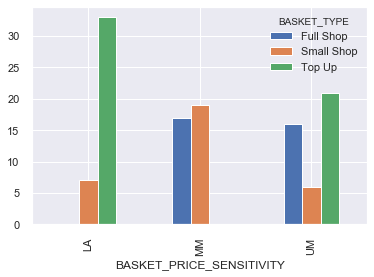

In [24]:
pd.crosstab(supmrkt_class_df.BASKET_PRICE_SENSITIVITY,supmrkt_class_df.BASKET_TYPE).plot(kind = "bar");

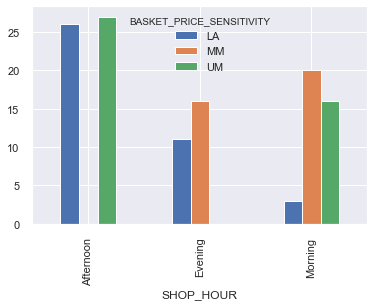

In [25]:
pd.crosstab(supmrkt_class_df.SHOP_HOUR,supmrkt_class_df.BASKET_PRICE_SENSITIVITY).plot(kind = "bar");

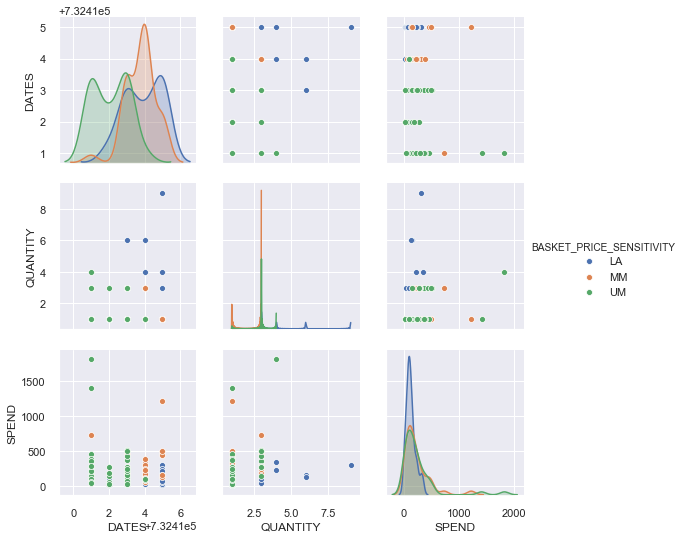

In [26]:
sns.pairplot(data=supmrkt_class_df, hue="BASKET_PRICE_SENSITIVITY");

In [27]:
supmrkt_class_df.columns

Index(['DATES', 'SHOP_HOUR', 'QUANTITY', 'SPEND', 'BASKET_SIZE', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'BASKET_PRICE_SENSITIVITY'],
      dtype='object')

In [28]:
for col in ['SHOP_HOUR','BASKET_SIZE','BASKET_TYPE', 'BASKET_DOMINANT_MISSION']:
    fe = supmrkt_class_df.groupby(col).size()/len(supmrkt_class_df)
    supmrkt_class_df.loc[:,col+'_FREQ_ENC'] = supmrkt_class_df[col].map(fe)
    supmrkt_class_df.drop(columns=[col],inplace=True)
supmrkt_class_df.sample(5)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,DATES,QUANTITY,SPEND,BASKET_PRICE_SENSITIVITY,SHOP_HOUR_FREQ_ENC,BASKET_SIZE_FREQ_ENC,BASKET_TYPE_FREQ_ENC,BASKET_DOMINANT_MISSION_FREQ_ENC
105,732413.0,1,223,UM,0.445378,0.697479,0.453782,0.075630
48,732411.0,1,456,UM,0.327731,0.697479,0.277311,0.310924
72,732415.0,1,154,LA,0.226891,0.302521,0.268908,0.537815
55,732411.0,1,217,UM,0.327731,0.697479,0.277311,0.310924
75,732412.0,1,24,UM,0.445378,0.302521,0.453782,0.075630


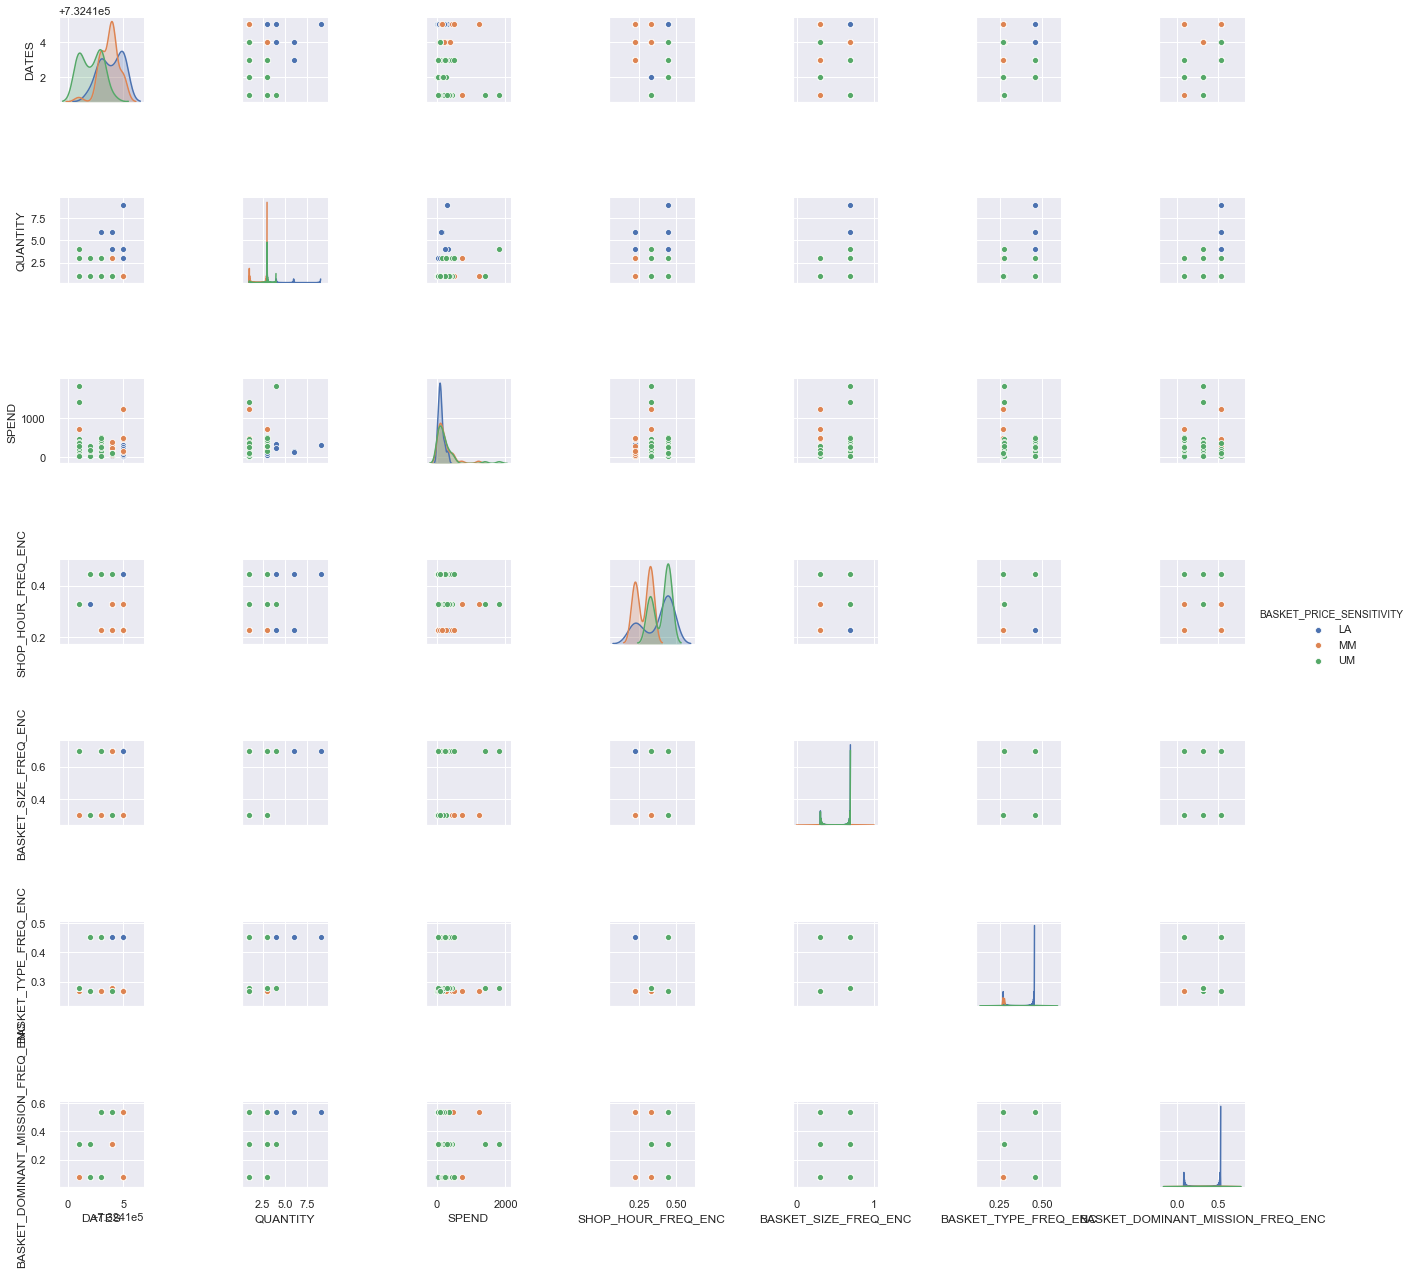

In [29]:
sns.pairplot(data=supmrkt_class_df, hue="BASKET_PRICE_SENSITIVITY");

In [30]:
supmrkt_class_df.describe()

,DATES,QUANTITY,SPEND,SHOP_HOUR_FREQ_ENC,BASKET_SIZE_FREQ_ENC,BASKET_TYPE_FREQ_ENC,BASKET_DOMINANT_MISSION_FREQ_ENC
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,732413.226891,1.512605,203.100840,0.357249,0.577996,0.355130,0.397359
std,1.265159,1.227272,248.774637,0.087548,0.182191,0.090351,0.169800
min,732411.000000,1.000000,13.000000,0.226891,0.302521,0.268908,0.075630
25%,732413.000000,1.000000,74.500000,0.327731,0.302521,0.268908,0.310924
50%,732413.000000,1.000000,132.000000,0.327731,0.697479,0.277311,0.537815
75%,732414.000000,1.000000,241.000000,0.445378,0.697479,0.453782,0.537815
max,732415.000000,9.000000,1820.000000,0.445378,0.697479,0.453782,0.537815


In [31]:
supmrkt_class_df.mode()

,DATES,QUANTITY,SPEND,BASKET_PRICE_SENSITIVITY,SHOP_HOUR_FREQ_ENC,BASKET_SIZE_FREQ_ENC,BASKET_TYPE_FREQ_ENC,BASKET_DOMINANT_MISSION_FREQ_ENC
0,732413.0,1,101,UM,0.445378,0.697479,0.453782,0.537815


In [32]:
supmrkt_class_df.median()

DATES                               732413.000000
QUANTITY                                 1.000000
SPEND                                  132.000000
SHOP_HOUR_FREQ_ENC                       0.327731
BASKET_SIZE_FREQ_ENC                     0.697479
BASKET_TYPE_FREQ_ENC                     0.277311
BASKET_DOMINANT_MISSION_FREQ_ENC         0.537815
dtype: float64

In [33]:
supmrkt_class_df.skew()

DATES                              -0.310511
QUANTITY                            3.215793
SPEND                               4.031387
SHOP_HOUR_FREQ_ENC                 -0.315165
BASKET_SIZE_FREQ_ENC               -0.870836
BASKET_TYPE_FREQ_ENC                0.184414
BASKET_DOMINANT_MISSION_FREQ_ENC   -0.785218
dtype: float64

In [34]:
supmrkt_class_df.kurtosis()

DATES                               -0.744049
QUANTITY                            13.266849
SPEND                               20.539802
SHOP_HOUR_FREQ_ENC                  -1.404679
BASKET_SIZE_FREQ_ENC                -1.263163
BASKET_TYPE_FREQ_ENC                -1.994890
BASKET_DOMINANT_MISSION_FREQ_ENC    -0.719849
dtype: float64

supmrkt_class_df.hist();

In [35]:
# supmrkt_class_df.plot()

In [36]:
# sns.distplot(supmrkt_class_df)

In [37]:
supmrkt_class_df.groupby("BASKET_PRICE_SENSITIVITY").mean()

,DATES,QUANTITY,SPEND,SHOP_HOUR_FREQ_ENC,BASKET_SIZE_FREQ_ENC,BASKET_TYPE_FREQ_ENC,BASKET_DOMINANT_MISSION_FREQ_ENC
BASKET_PRICE_SENSITIVITY,,,,,,,
LA,732413.925000,1.800000,127.625000,0.376471,0.628361,0.421429,0.503151
MM,732413.777778,1.277778,231.472222,0.282913,0.489029,0.272876,0.366480
UM,732412.116279,1.441860,249.558140,0.401603,0.605628,0.362322,0.324800


In [38]:
supmrkt_class_df.BASKET_PRICE_SENSITIVITY.value_counts()

UM    43
LA    40
MM    36
Name: BASKET_PRICE_SENSITIVITY, dtype: int64

***Null Hypothesis***
> The mean of Less affluent is less than that of the Middle Market

>$H$<sub>$0$</sub> : $\mu$<sub>$1$</sub>$ = \mu$<sub>$2$</sub>

***Alternative Hypothesis***
>The mean of Less Affluent is not less than that of Middle Market

>$H$<sub>$1$</sub> : $\mu$<sub>$1$</sub>$ \neq \mu$<sub>$2$</sub>

In [39]:
a = supmrkt_class_df[supmrkt_class_df.BASKET_PRICE_SENSITIVITY == "LA"]["SPEND"]
b = supmrkt_class_df[supmrkt_class_df.BASKET_PRICE_SENSITIVITY == "MM"]["SPEND"]
ttest, p_value = stats.ttest_ind(a,b)

print("P-Value = ", p_value, "\nttest = ", ttest)

P-Value =  0.010486276946378246 
ttest =  -2.626250560899812


***Reject the null Hypothesis since the p-value is below 0.05***

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
supm = supmrkt_class_df[['DATES', 'QUANTITY', 'SPEND','SHOP_HOUR_FREQ_ENC', 'BASKET_SIZE_FREQ_ENC', 'BASKET_TYPE_FREQ_ENC','BASKET_DOMINANT_MISSION_FREQ_ENC']]
supm.columns

Index(['DATES', 'QUANTITY', 'SPEND', 'SHOP_HOUR_FREQ_ENC',
       'BASKET_SIZE_FREQ_ENC', 'BASKET_TYPE_FREQ_ENC',
       'BASKET_DOMINANT_MISSION_FREQ_ENC'],
      dtype='object')

In [55]:
vif = pd.DataFrame()
vif["features"] = supm.columns
vif["VIF Factor"] = [variance_inflation_factor(supm.values, i) for i in range(supm.shape[1])]
vif 

,features,VIF Factor
0,DATES,29.023066
1,QUANTITY,2.898444
2,SPEND,1.975303
3,SHOP_HOUR_FREQ_ENC,29.124617
4,BASKET_SIZE_FREQ_ENC,14.920968
5,BASKET_TYPE_FREQ_ENC,34.281481
6,BASKET_DOMINANT_MISSION_FREQ_ENC,7.826374
